## Exercise 1 – Procedural vs Functional Programming
Problem Definition:
Given a list of numbers and words, find the count of each element type in the list.

In [1]:
#import necessary modules and packages
import random, string, timeit
import matplotlib.pyplot as plt

#1. Create a function the will randomly generate a list of N numbers and words. 
   Numbers and words count are random and the order is random too.

In [2]:
def generate_random_words():
    """
    Generate a string of a random number of words with random lengths
    """
    store_words = []
    #generate a random integer between 1 and 10 as the number of words in a word string
    num_words = random.randint(1, 10)
    letters = string.ascii_lowercase
    for i in range(num_words):
        #generate a random intger between 1 and 10 as the length of a word
        word_length = random.randint(1,10)
        #generate a random word with predetermined length n
        word = ''.join([random.choice(letters) for i in range(word_length)])
        store_words.append(word)
    #join a random number of random words into a single string separated by empty space
    return ' '.join(store_words)

def list_generation(N):
    """
    Generate a list of N elements. 
    The list consists of a random number of randomly generated numbers from -500 to 500
    and a random number of words that may appear as a single word or in a string of words.
    """
    output = []
    for num in range(N):
        #randomly generate an integer 0 or 1
        element_type = random.randint(0,1)
        #if 0 is generated, then append a random number to output list
        if element_type == 0:
            output.append(random.randint(-500,500))
        #if 1 is generated, append a random-length string of random words to output list
        else:
            output.append(generate_random_words())
    return output

list_generation(10)

['e ccvzsrc fiduga nozlayw tzqosop piiusedyj icuw wmwrlzfl qrzlyay',
 'ctz l lgoleut xparsrfrrw sewn',
 54,
 463,
 67,
 'wbhf mqnueuyg jjmklm kqzvvv b nlnqp phwquq jqrkla uibqz',
 'idlfheh',
 315,
 345,
 -99]

#2. Create two functions to calculate the desired output as follows:
   #a. Procedural code by using loops
   #b. Functional code by using list comprehension.

In [3]:
#Procedural code by using loops
def element_type_count(lst):
    """
    Use procedural code to count the number of numbers and number of words appeared in a list.
    """
    number = 0
    words = 0
    for item in lst:
        #if the item type is integer, increase number counter by 1
        if type(item) == int:
            number += 1
        else: #if item type is not int (i.e. is string), count the number of words in it and add to word counter
            words += len(item.split(' '))
    return 'Count of Numbers: ' + str(number) + '\n' + 'Count of words: ' + str(words)

lst1 = list_generation(8)
print(element_type_count(lst1))
lst1

Count of Numbers: 4
Count of words: 15


[-175,
 53,
 'llmiqwvzh fqyjhxoe oskgnvrd',
 -217,
 -454,
 'quunmo ffetsorxei tecsfsc',
 'cpb savmiocqz e pgszsk fiyhdrheec hngmqjlo',
 'mriioxpsjr v ru']

In [4]:
#Functional code by using list comprehension.
def element_type_count_2(lst):
    """
    Use functional code to count the number of numbers and number of words appeared in a list.
    """
    #count total number of numbers in the generated list
    number = sum([1 for item in lst if type(item) == int])
    #count total number of words in generated list
    words = sum([len(item.split(' ')) for item in lst if type(item) == str])
    return 'Count of Numbers: ' + str(number) + '\n' + 'Count of words: ' + str(words)   

lst2 = list_generation(8)
print(element_type_count_2(lst2))
lst2

Count of Numbers: 3
Count of words: 29


['kthtq apka hktscu',
 487,
 'luklsdymb vjf eifbdgeewg sihv',
 'qwaswfzic emyktxtmo kcuqrg rujlh dmenv',
 'bgruqjc wuezbw nnbmpycohs vexuu k vorni gihtct llmpfcvj',
 -331,
 262,
 'zvi vgahpaqfs yammcm xrlj sc qmdrulsj fbfripwz xsgn hfogpc']

#3. Use TimeIt standard library and matplotlib to present the performance difference among the 2 solutions for different list sizes (N=100, 1000, 10000, 100000).

In [6]:
N_list = [100, 1000, 10000, 100000]
#initialize two empty lists to store the running time of two functions in 4 cases
procedural = []
functional = []
for item in N_list:
    #generate a list of random numbers and words with specified length
    lst = list_generation(item)
    #record the running time of two functions on the same list
    procedural.append(timeit.timeit(lambda:element_type_count(lst),number=1))
    functional.append(timeit.timeit(lambda:element_type_count_2(lst),number=1))
print(procedural)
print(functional)

[6.765604484826326e-05, 0.0005183650646358728, 0.005176059901714325, 0.04504909797105938]
[7.996801286935806e-05, 0.0006115409778431058, 0.0066138459369540215, 0.05748269893229008]


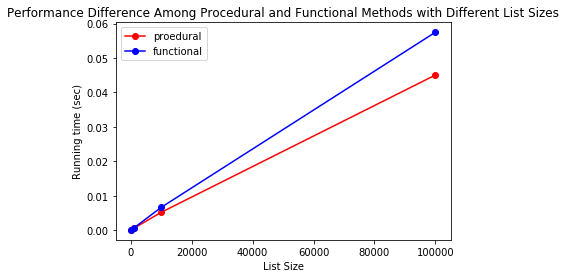

In [7]:
#plot a line graph to present the differences in running time
plt.plot(N_list, procedural, 'r', marker = 'o') #red line represents the performance of procedural function
plt.plot(N_list, functional, 'b', marker = 'o') #blue line represents the performance of functional function
plt.legend(['proedural','functional'])
plt.title('Performance Difference Among Procedural and Functional Methods with Different List Sizes')
plt.xlabel('List Size')
plt.ylabel('Running time (sec)')
plt.show()

## Exercise 2 – Simple Student Grading System - memory based

In [8]:
#import necessary modules and packages
import statistics
import matplotlib.pyplot as plt

In [9]:
def load_data(filepath):
    """
    Load the dataset from exams.csv and store it into a dictionary
    with key = student ID, value = [student name, quiz, project, exam]
    """
    with open(filepath, 'r') as f:
        data = f.readlines()
    #initialize an empty dictionary
    class_info = {}
    for item in data[1:]:#remove the header
        #split the strings of student information into lists of strings
        student_info = item[:-1].split(',')
        #fill in the dictionary by using unique student ID as dictionary key
        #[student name, quiz, project, exam] as dictionary value
        class_info[int(student_info[0][2:])] = [student_info[1]] + [int(item) for item in student_info[2:]]
    return class_info
load_data('exams.csv')

{1: ['James', 43, 51, 55],
 2: ['Josephine', 76, 84, 87],
 3: ['Art', 89, 94, 92],
 4: ['Lenna', 70, 67, 64],
 5: ['Donette', 63, 59, 58],
 6: ['Simona', 65, 69, 68],
 7: ['Mitsue', 41, 43, 34],
 8: ['Leota', 63, 72, 70],
 9: ['Sage', 56, 71, 65],
 10: ['Kris', 60, 66, 65],
 11: ['Minna', 41, 49, 43],
 12: ['Abel', 53, 54, 50],
 13: ['Kiley', 58, 52, 57],
 14: ['Graciela', 69, 79, 74],
 15: ['Cammy', 55, 67, 58],
 16: ['Mattie', 73, 69, 72],
 17: ['Meaghan', 69, 81, 76],
 18: ['Gladys', 69, 70, 73],
 19: ['Yuki', 82, 81, 79],
 20: ['Fletcher', 66, 79, 76],
 21: ['Bette', 58, 62, 63],
 22: ['Veronika', 90, 83, 77],
 23: ['Willard', 75, 67, 65],
 24: ['Maryann', 66, 52, 57],
 25: ['Alisha', 74, 69, 64],
 26: ['Allene', 78, 84, 81],
 27: ['Chanel', 45, 53, 49],
 28: ['Ezekiel', 53, 69, 62],
 29: ['Willow', 91, 94, 93],
 30: ['Bernardo', 48, 46, 42],
 31: ['Ammie', 65, 70, 65],
 32: ['Francine', 76, 93, 88],
 33: ['Ernie', 66, 70, 71],
 34: ['Albina', 21, 41, 33],
 35: ['Alishia', 65, 66, 

In [10]:
# Write two helper functions in this cell
def total_calculator(quiz,project,exam):
    """
    Calculate student's final score based on given criteria:
    Exams Score (40% of the final grade)
    Projects Score (30% of the final grade)
    Quizzes Score (30% of the final grade)
    """
    total_score = 0.3 * quiz + 0.3 * project + 0.4 * exam
    return round(total_score, 1) #round final score to 1 decimal number

def grade_convertor(total):
    """
    Convert student's final score into letter grade based on
    [90-100]:A ; [80-90): B ; [20-80): C ; [10-20): D ; [0-10): F
    """
    if total >= 90 and total <= 100:
        return 'A'
    elif total >= 80 and total < 90:
        return 'B'
    elif total >= 20 and total < 80:
        return 'C'
    elif total <20 and total >= 10:
        return 'D'
    else:
        return 'F'


In [11]:
def print_grades(database):
    """
    Print a list of student names, final scores, and letter grades sorted by names.
    """
    #initialize a list to store students' final scores and grades
    final_result = []
    for info in database.values():
        name = info[0]
        total = total_calculator(info[1],info[2],info[3]) #get final score
        grade = grade_convertor(total) #get final grade
        #each student's final result will be stored in a list then put into the class list final_result
        final_result.append([name, total, grade])
    #sort students' information in the list of lists by names
    final_result.sort(key = lambda x: x[0])
    print("Student Name" + "      Final Score" + "    Letter Grade")
    # print each student's final result line by line with specified format
    for item in final_result:
        print("{:<12}  :       {}    |       {}".format(item[0],item[1], item[2]))
print_grades(load_data('exams.csv'))

Student Name      Final Score    Letter Grade
Abel          :       52.1    |       C
Albina        :       31.8    |       C
Alisha        :       68.5    |       C
Alishia       :       66.5    |       C
Allene        :       81.0    |       B
Amber         :       78.8    |       C
Ammie         :       66.5    |       C
Arlene        :       65.9    |       C
Arlette       :       67.9    |       C
Art           :       91.7    |       A
Bernardo      :       45.0    |       C
Bette         :       61.2    |       C
Blair         :       91.4    |       A
Blondell      :       32.3    |       C
Bobbye        :       57.9    |       C
Brock         :       75.2    |       C
Cammy         :       59.8    |       C
Carma         :       61.7    |       C
Carmelina     :       58.9    |       C
Cecily        :       48.2    |       C
Chanel        :       49.0    |       C
Cory          :       84.3    |       B
Danica        :       56.2    |       C
Deeanna       :       81.8    |   

In [12]:
#helper function
def class_result_generator(database):
    """
    Generate a list of final scores and a list of final grades of the whole class
    """
    score = []
    grade = []
    for value in database.values(): #Retrieve information from the class information dictionary
        total = total_calculator(value[1],value[2],value[3]) #calculate final score
        score.append(total) #add score to the score list
        grade.append(grade_convertor(total)) #get final grade from final score and add it to grade list
    return score,grade

In [13]:
#helper function
def mode(data):
    """
    Return data values that appear the most often in a list.
    Multiple modes are allowed
    """
    #obtain the unique values in the list
    DataSet = set(data)
    #count each unique value's number of appearance in the list and store [value, # of appearance] in a list
    lst = [[item, data.count(item)] for item in DataSet]
    #sort the [[value, # of appearance],..] list by # of appearance in descending order
    lst.sort(key = lambda x: x[1], reverse = True)
    #find all values with # of appearance equal to the first such value in the list
    return [elm[0] for elm in lst if elm[1] == lst[0][1]]

In [14]:
def score_summary(database):
    """
    Print the class's final score summary 
    including Student Count, Min, Max, Mean, Mode, and Standard Deviation
    """
    #get a list of final scores of the whole class
    score = class_result_generator(database)[0]
    StudentCount = len(database)
    max_score = max(score)
    min_score = min(score)
    mean_score = statistics.mean(score)
    std = statistics.stdev(score)
    mode_score = mode(score)
    print('Score Summary ' + '\n' + 
           'Student Count: ' + str(StudentCount) + '\n' +
           'Max Final Score: ' + str(max_score) + '\n' + 
           'Min Final Score: ' + str(min_score) + '\n' +
           'Mean Final Score: ' + str(mean_score) +'\n' +
           'Standard Deviation of Final Score: ' + str(std) + '\n' +
           'Mode of Final Score: ' + str(sorted(mode_score)))
score_summary(load_data('exams.csv')) 

Score Summary 
Student Count: 100
Max Final Score: 99.7
Min Final Score: 31.8
Mean Final Score: 69.053
Standard Deviation of Final Score: 14.199917875705045
Mode of Final Score: [59.8, 66.5, 68.5, 74.6, 82.8, 83.6]


In [15]:
def very_high_scores(database):
    """
    Identify values that are larger than the mean and two times standard deviation
    """
    scores = class_result_generator(database)[0]
    high = [score for score in scores if score > statistics.mean(scores) + 2 * statistics.stdev(scores)]
    print("Very high scores (scores that are larger than the mean and two times standard deviation): ", high)
very_high_scores(load_data('exams.csv'))

Very high scores (scores that are larger than the mean and two times standard deviation):  [99.7, 97.9]


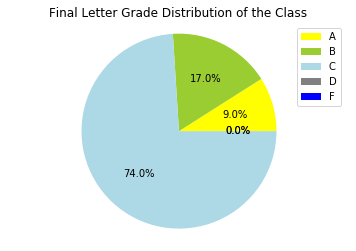

In [16]:
def grade_distribution(database):
    """
    Plot a pie chart showing the final letter grades distribution of the class.
    """
    #get a list of students' final grades of the whole class
    grades = class_result_generator(database)[1]
    label = ['A','B','C','D','F']
    #count appearance of each letter grade and store them in a list
    count = [grades.count(item) for item in label]
    colors = ['yellow', 'yellowgreen','lightblue','grey', 'blue']
    #plot a pie chat presenting the final letter grade distribution
    plt.pie(count, colors=colors, autopct='%1.1f%%',shadow=False)
    plt.axis('equal')
    plt.legend(label)
    plt.title('Final Letter Grade Distribution of the Class')
    plt.show()
grade_distribution(load_data('exams.csv'))

In [17]:
def get_box_parameters(database):
    """
    Create box plots parameters min, max, median, Q1, Q3.
    """
    #get a list of final scores of the whole class
    scores = class_result_generator(database)[0]
    max_score = max(scores)
    min_score = min(scores)
    median = statistics.median(scores)
    #sort the list of final scores in ascending order
    scores.sort()
    #find Q1 by calculating the median of first half of students' scores in the sorted list
    Q1 = statistics.median(scores[:len(scores)//2])
    #find Q3 by calculating the median of second half of students' scores in the sorted list
    Q3 = statistics.median(scores[len(scores)//2:])
    print('Box plot parameters: ' + '\n' +
         'Max Final Score: ' + str(max_score) + '\n' +
         'Min Final Score: ' + str(min_score) + '\n' +
         'Median Final Score: ' + str(median) + '\n' +
         'First Quartile Q1: ' + str(Q1) + '\n' +
         'Third Quartile Q3: ' + str(Q3))
get_box_parameters(load_data('exams.csv'))

Box plot parameters: 
Max Final Score: 99.7
Min Final Score: 31.8
Median Final Score: 68.65
First Quartile Q1: 60.25
Third Quartile Q3: 80.30000000000001



    ---WELCOME TO STUDENT INFORMATION SYSTEM---
    Please select from the following options by entering number 1 - 7 :)
    1  Load Dataset
    2  Print Student Final Scores And Grades
    3  Print Score Summary
    4  Identify Very High Scores
    5  Print Final Grade Distribution
    6  Create Box Plots Parameters
    7  Exit the System
    
What would you like to do in Student Information System? 0

 Not Valid Choice Try again !

    ---WELCOME TO STUDENT INFORMATION SYSTEM---
    Please select from the following options by entering number 1 - 7 :)
    1  Load Dataset
    2  Print Student Final Scores And Grades
    3  Print Score Summary
    4  Identify Very High Scores
    5  Print Final Grade Distribution
    6  Create Box Plots Parameters
    7  Exit the System
    
What would you like to do in Student Information System? 1

 Exams dataset has been successully loaded!

    ---WELCOME TO STUDENT INFORMATION SYSTEM---
    Please select from the following options by entering numb

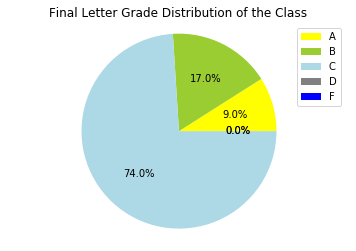


    ---WELCOME TO STUDENT INFORMATION SYSTEM---
    Please select from the following options by entering number 1 - 7 :)
    1  Load Dataset
    2  Print Student Final Scores And Grades
    3  Print Score Summary
    4  Identify Very High Scores
    5  Print Final Grade Distribution
    6  Create Box Plots Parameters
    7  Exit the System
    
What would you like to do in Student Information System? 6
Box plot parameters: 
Max Final Score: 99.7
Min Final Score: 31.8
Median Final Score: 68.65
First Quartile Q1: 60.25
Third Quartile Q3: 80.30000000000001

    ---WELCOME TO STUDENT INFORMATION SYSTEM---
    Please select from the following options by entering number 1 - 7 :)
    1  Load Dataset
    2  Print Student Final Scores And Grades
    3  Print Score Summary
    4  Identify Very High Scores
    5  Print Final Grade Distribution
    6  Create Box Plots Parameters
    7  Exit the System
    
What would you like to do in Student Information System? 7

 You successfully exit the syst

In [30]:
#build the student information system with a console based menu
status=True
#initialize a database (dict), it will be filled out once user loads the dataset
database = {}
while status:
    #user menu
    print ("""
    ---WELCOME TO STUDENT INFORMATION SYSTEM---
    Please select from the following options by entering number 1 - 7 :)
    1  Load Dataset
    2  Print Student Final Scores And Grades
    3  Print Score Summary
    4  Identify Very High Scores
    5  Print Final Grade Distribution
    6  Create Box Plots Parameters
    7  Exit the System
    """)
    
    status=input("What would you like to do in Student Information System? ") 
    if status=="1": 
        database = load_data("exams.csv")
        print("\n Exams dataset has been successully loaded!")
    elif status=="2" and database != {}: #if data has not been loaded, the system can't provide further information
        print_grades(database)
    elif status=="3" and database != {}:
        score_summary(database)
    elif status=="4" and database != {}:
        very_high_scores(database) 
    elif status=="5" and database != {}:
        grade_distribution(database)
    elif status=="6" and database != {}:
        get_box_parameters(database)
    #use should load the dataset before requesting further information
    elif status in ("2","3","4","5","6") and database == {}: 
        print("Please load the data first! Try 1")
    elif status=="7":
        print("\n You successfully exit the system! See you next time!")
        #stop the while loop and quit the system
        status = False
    else: #print warning if input number choice is not valid
        print("\n Not Valid Choice Try again !")
        status = True

## Exercise 3  -- NumPy
Pick an extension library from PyPI or other sources (something of interest to you). Summarize the functionality provided by the library (one paragraph) and show a usage example.

### Summary:
NumPy, stands for 'Numerical Python', is a commonly used Python library in the fields of data analysis and machine learning. The main functionality of NumPy is that it provides a powerful high-performance multidimensional array object -- ndarray (n-dimensional array, it can have any number of dimensions), together with tools for working with these array objects. NumPy consists of a rich collection of sophisticated (broadcasting) functions which could efficiently help on scientific computing tasks such as array/matrix arithematics, linear algebra operations, matrix shape manipulations, Fourier transform and random number generations. As an array-processing package, NumPy brings efficiency in memory and also provides fast numerical operations compared to Python built-in data structure list. Different from list, instead of doing for loop through the whole list, calculations can be done on the whole NumPy array at once. But NumPy array can only store data of the same type.

### Explanations and examples on numpy functions that will be used in the following usage exmaple:
* np.random.rand(n, m) -> generate an n*m matrix where each entry is a random number lies in [0, 1)
* np.random.randn(n, m) -> generate an n*m matrix where each entry is a random number from standard normal   distribution.
* np.dot(a,b) 
         * --> if a, b are numbers, return a * b
         * --> if a, b are 1D arrays, return inner product of vectors
         * --> if a, b are 2D arrays, it is matrix multiplication (make sure dimensions of matrices match)
* np.square(array) -> Return the element-wise square of the input array.
* np.transpose(a) -> return the transpose of matrix a
* np.hstack(tup) -> Stack arrays in tup in sequence horizontally (column wise) into a new ndarray
* np.ones(shape) -> Return a new array of given shape and type, filled with 1's.


In [19]:
import numpy as np

In [20]:
#np.random.rand(n, m) -> generate an n*m matrix where each entry is a random number lies in [0, 1)
np.random.rand(2,2)

array([[ 0.10389072,  0.54677748],
       [ 0.45889427,  0.1753636 ]])

In [21]:
#np.random.randn(n, m) -> generate an n*m matrix where each entry is a random number from standard normal distribution.
np.random.randn(3,2)

array([[-0.34632911,  0.71024958],
       [ 0.277007  ,  1.14862001],
       [ 0.94137627,  0.89446776]])

In [22]:
#np.array([list]) -> make an array
#np.dot(a,b)
   #* --> if a, b are numbers, return a * b
   #* --> if a, b are 1D arrays, return inner product of vectors
   #* --> if a, b are 2D arrays, it is matrix multiplication (make sure dimensions of matrices match)
array1 = np.array([1,2])
array2 = np.array([3,4])
array3 = np.array([[1,2],[3,4]])
array4 = np.array([[5,6],[7,8]])
#case1: if a, b are numbers, return a * b
print(np.dot(2,5))
#case2: if a, b are 1D arrays, return inner product of vectors
print(np.dot(array1, array2))
#case3: if a, b are 2D arrays, it is matrix multiplication (make sure dimensions of matrices match)
print(np.dot(array3, array4))

10
11
[[19 22]
 [43 50]]


In [23]:
#np.square(array) -> Return the element-wise square of the input array.
print(np.square(array3))
#np.transpose(a) -> return the transpose of matrix a
print(np.transpose(array3))

[[ 1  4]
 [ 9 16]]
[[1 3]
 [2 4]]


In [24]:
#np.ones(shape) -> Return a new array of given shape and type, filled with 1's
array_ones = np.ones((2,1)) #create a 2*1 vector of 1's
print(array_ones)
#np.hstack(tup) -> Stack arrays in tup in sequence horizontally (column wise) into a new ndarray
print(np.hstack((array_ones, array3)))

[[ 1.]
 [ 1.]]
[[ 1.  1.  2.]
 [ 1.  3.  4.]]


### Usage Example
* The following is an example of using Gradient Descent procedure to find simple linear regression coefficients on a given dataset. 
* The whole procedure consists of random number generations, matrix linear algebras, arrays/matrices arithematics and matrix shape manipulations.

<class 'numpy.ndarray'>
200 * 1 vector X: 
 [[ 2.83188063]
 [ 3.22982436]
 [ 7.22332774]
 [ 7.02651729]
 [ 9.78017048]
 [ 9.98193926]
 [ 4.60049993]
 [ 6.53360751]
 [ 5.40330292]
 [ 8.75528195]
 [ 6.95006179]
 [ 9.26516063]
 [ 2.9897309 ]
 [ 1.01290187]
 [ 7.58002596]
 [ 8.27537483]
 [ 5.75366658]
 [ 4.22060684]
 [ 4.96363852]
 [ 1.31957829]
 [ 3.57836527]
 [ 9.04334389]
 [ 7.55555861]
 [ 6.08620009]
 [ 6.83879198]
 [ 4.8046731 ]
 [ 0.93809979]
 [ 1.49078006]
 [ 5.03250907]
 [ 4.04791875]
 [ 8.54833397]
 [ 5.99435568]
 [ 6.47272398]
 [ 1.85801015]
 [ 5.90036499]
 [ 9.63826908]
 [ 8.42911461]
 [ 4.07622938]
 [ 2.64603982]
 [ 8.70579943]
 [ 9.40047725]
 [ 9.68980319]
 [ 5.3455594 ]
 [ 4.77498862]
 [ 0.26521981]
 [ 2.36806145]
 [ 7.4995424 ]
 [ 4.27095478]
 [ 2.81561511]
 [ 4.54018166]
 [ 7.36599421]
 [ 9.99052603]
 [ 3.28162138]
 [ 1.68369507]
 [ 6.65237442]
 [ 0.15237364]
 [ 8.20857263]
 [ 9.06460886]
 [ 1.18930954]
 [ 5.55654413]
 [ 9.0238154 ]
 [ 6.26791877]
 [ 1.78695276]
 [ 0.364645

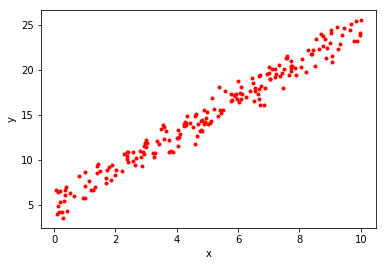

In [25]:
## Step 1: Create a dataset which follows the following model
# generate an array/vector of 200 numbers which lie in the interval [0, 10)
X = 10 * np.random.rand(200, 1)
print(type(X)) #type of X is numpy ndarray
# create an array/vector of y's such that y is obtained from a linear model of x with random Gaussian noise 
Y = 5 + 2 * X + np.random.randn(200, 1) #both X,Y are stored as np.ndarray
print("200 * 1 vector X: \n", X)
print("200 * 1 vector Y: \n", Y)
# plot the dataset we created
plt.plot(X, Y,'r.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [26]:
##Helper function: cost calculation
def compute_cost(features, values, theta):
    """
    Compute the cost of a list of parameters, theta, given a list of features 
    (input data points) and values (output data points).
    """
    m = len(values)
    #calculate predicted value based on formula y_hat = theta_0 + theta_1 * x
    pred_value = np.dot(features, theta)
    #calculate sum of squared errors (SSE) of the predicted model
    sum_of_square_errors = np.square(pred_value - values).sum()
    cost = sum_of_square_errors / (2*m)
    return cost

In [27]:
##Helper function: Gradient Descent with specified iterations
def gradient_descent(features, values, theta, alpha, num_iterations):
    """
    Perform gradient descent cost minimization procedure.
    Return final theta vector and cost history given specified number of iterations and learning rate alpha.
    """
    m = len(values)
    cost_history = []
    for i in range(num_iterations):
        # update the theta vector according to gradient descent formula
        theta = theta - (alpha/m) * np.dot(np.transpose(features), (np.dot(features, theta) - values))
        # compute the new cost and add it to the cost history
        cost = compute_cost(features, values, theta)
        cost_history.append(cost)
    return theta, cost_history

In [28]:
#Perform gradient descent on our created dataset
alpha =0.01
num_iterations = 2000
# initialize a theta vector by randomly choosing from standard normal distribution
theta = np.random.rand(2,1)
# concatenate a column vector of 1's (intercept) and the feature vector X
X_b = np.hstack((np.ones((X.shape[0],1)),X))
theta, cost_history = gradient_descent(X_b, Y, theta, alpha, num_iterations)
print('Estimated theta_0 Intercept: {:0.3f},\nEstimated theta_1 Slope: {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final Cost: {:0.3f}'.format(cost_history[-1]))
# Example result:
# The predicted theta0 (intercept) is 5.042, predicted theta1 (slope) is 1.980.
# The actual theta0 is 5 and actual theta1 is 2.
# So our predictions are very close to the acutal thetas, performance of our gradient descent function is satisfactory.

Estimated theta_0 Intercept: 5.042,
Estimated theta_1 Slope: 1.980
Final Cost: 0.477
